### Démarche d'implémentation "from scratch"

pour ce projet, j'ai choisi de ne pas utiliser les fonctions automatiques comme `linearregression` ou `.fit()` de scikit-learn. l'idée est de coder l'algorithme d'optimisation manuellement pour bien comprendre la théorie du cours.

#### étapes suivies :

1. **préparation des données** : 
   - encodage manuel des variables texte (ex: le statut "smoker" devient 0 ou 1).
   - normalisation z-score pour que l'algorithme converge rapidement.

2. **fonction d'hypothèse** : 
   - $h_\theta(x) = \theta_0 + \theta_1 x_1 + ... + \theta_n x_n$

3. **calcul du gradient** : 
   - pour mettre à jour les poids, on calcule les dérivées partielles de la fonction de coût $J(\theta)$ :
   - pour le biais ($\theta_0$) : $$\frac{\partial J}{\partial \theta_0} = \frac{1}{m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)})$$
   - pour les poids ($\theta_j$) : $$\frac{\partial J}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)}) \cdot x_j^{(i)}$$

4. **boucle d'entraînement (optimisation)** : 
   - mise à jour simultanée : $\theta = \theta - \alpha \cdot \text{gradient}$

5. **évaluation** : 
   - calcul manuel du score $r^2$ et de l'accuracy.

### Partie 1 : Régression Linéaire

1.1 Chargement et Analyse des données

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [2]:
# Chargement du dataset
df = pd.read_csv('insurance.csv')
df.head()



,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


1.2 Analyse des corrélations (Heatmap)

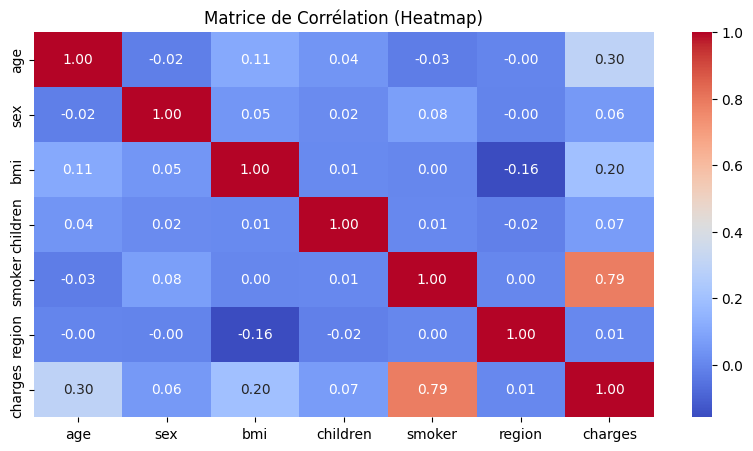

In [ ]:

# --- ENCODAGE MANUEL ---
# On transforme les catégories en nombres 
df_encoded = df.copy()
df_encoded['sex'] = df_encoded['sex'].map({'female': 0, 'male': 1})
df_encoded['smoker'] = df_encoded['smoker'].map({'yes': 1, 'no': 0})
df_encoded['region'] = df_encoded['region'].map({'southwest': 0, 'southeast': 1, 'northwest': 2, 'northeast': 3})

# Visualisation de la corrélation
plt.figure(figsize=(10, 5))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matrice de Corrélation (Heatmap)')
plt.show()

In [42]:
df_encoded.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


#### régression linéaire from scratch

pour ce modèle, nous utilisons la **batch gradient descent**. 

- **hypothèse** : $h_\theta(x) = x \cdot \theta + b$
- **mise à jour** : $\theta = \theta - \alpha \cdot \text{gradient}$

**pourquoi ce choix ?**
j'ai choisi la méthode **batch** car elle calcule le gradient sur l'ensemble des données, garantissant ainsi une trajectoire stable et une convergence directe vers le minimum global de l'erreur, ce qui est idéal pour la précision sur un dataset de cette taille.

1.3 Modélisation et Évaluation

In [ ]:

    x_brut = df_encoded.drop('charges', axis=1).values
    y_brut = df_encoded['charges'].values
    
    # split des données
    x_train, x_test, y_train, y_test = train_test_split(x_brut, y_brut, test_size=0.2, random_state=42)

    # normalisation manuelle 
    mu = np.mean(x_train, axis=0)
    sigma = np.std(x_train, axis=0)
    x_train_scaled = (x_train - mu) / sigma
    x_test_scaled = (x_test - mu) / sigma

    #  2. entraînement 
    m, n = x_train_scaled.shape
    theta = np.zeros(n)  # initialisation des poids à 0
    bias = 0             # initialisation du biais à 0
    lr = 0.05            # learning rate (alpha)
    epochs = 2000        # nombre d'itérations

    for i in range(epochs):
        # h(x) = x * theta + b
        y_pred_train = np.dot(x_train_scaled, theta) + bias
        
        # calcul des gradients
        erreurs = y_pred_train - y_train
        d_theta = (1/m) * np.dot(x_train_scaled.T, erreurs)
        d_bias = (1/m) * np.sum(erreurs)
        
        # mise à jour
        theta -= lr * d_theta
        bias -= lr * d_bias

    # --- 3. prédiction et évaluation ---
    y_final_pred = np.dot(x_test_scaled, theta) + bias

    mse = np.mean((y_test - y_final_pred)**2)
    r2 = 1 - (np.sum((y_test - y_final_pred)**2) / np.sum((y_test - np.mean(y_test))**2))
    # calcul du rmse (racine carrée du mse)
    rmse = np.sqrt(mse)

    print(f"--- résultats ---")
    print(f"R2 score : {r2:.4f}")
    print(f"MSE      : {mse:.2f}")
    print(f"RMSE     : {rmse:.2f}")

--- résultats ---
R2 score : 0.7833
MSE      : 33635210.43
RMSE     : 5799.59


1.4 Interprétation des coefficients

In [ ]:

# 1. on récupère le nom des colonnes depuis le dataframe d'origine (df_encoded)
# en excluant la colonne cible 'charges'
noms_colonnes = df_encoded.drop('charges', axis=1).columns

# 2. on crée le tableau des coefficients avec 'theta' 
coefficients = pd.DataFrame({
    'variable': noms_colonnes, 
    'coefficient': theta
})

# 3. on trie pour voir les variables les plus influentes
coefficients_tries = coefficients.sort_values(by='coefficient', ascending=False)

print("--- importance des variables (poids theta) ---")
print(coefficients_tries)

--- importance des variables (poids theta) ---
   variable  coefficient
4    smoker  9557.143383
0       age  3616.108652
2       bmi  2028.308579
3  children   516.662566
5    region   302.387980
1       sex    -9.392954


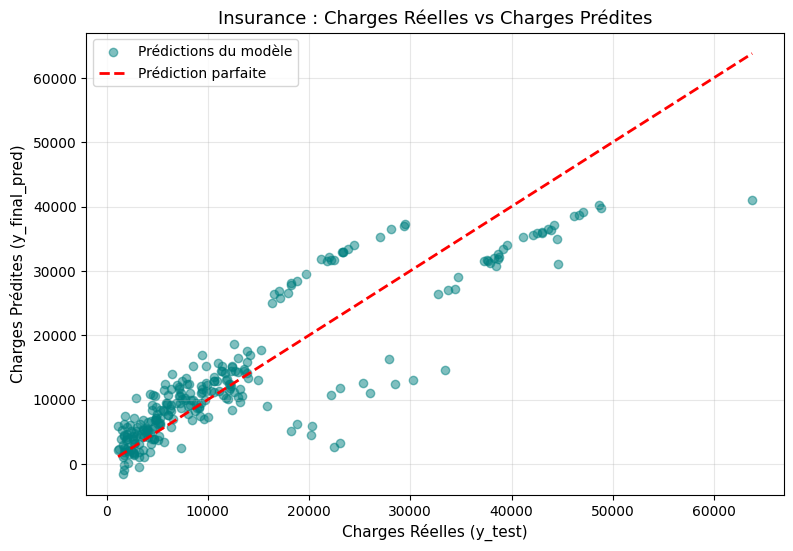

In [41]:
import matplotlib.pyplot as plt
import numpy as np

# 1. Utilisation de tes noms de variables : x_test_scaled, theta, bias
y_final_pred = np.dot(x_test_scaled, theta) + bias

plt.figure(figsize=(9, 6))

# On compare tes vraies charges (y_test) aux prédictions (y_final_pred)
plt.scatter(y_test, y_final_pred, color='teal', alpha=0.5, label='Prédictions du modèle')

# Ligne de perfection (y = x)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
         color='red', linestyle='--', linewidth=2, label='Prédiction parfaite')

plt.title('Insurance : Charges Réelles vs Charges Prédites', fontsize=13)
plt.xlabel('Charges Réelles (y_test)', fontsize=11)
plt.ylabel('Charges Prédites (y_final_pred)', fontsize=11)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

##### Conclusion sur les coefficients :
1. **Smoker (Tabagisme) :** C'est la variable avec le coefficient le plus élevé. Cela confirme ce que nous avons vu sur la heatmap : être fumeur est le facteur principal d'augmentation des frais.
2. **BMI (IMC) et Age :** Ces variables ont également un impact positif significatif.


### partie 2 : régression logistique (classification iris)

pour classer les fleurs iris-setosa, la différence majeure avec la régression linéaire est l'utilisation de la **fonction sigmoïde** $\sigma(z)$. cette fonction permet de transformer n'importe quel nombre réel en une probabilité comprise entre 0 et 1.

#### étapes suivies :

1. **hypothèse et activation** : 
   - on calcule d'abord le score linéaire : $z = X\theta + b$.
   - on applique la sigmoïde : $h_\theta(x) = \frac{1}{1 + e^{-z}}$.

2. **seuil de décision (classification)** :
   - pour décider de la classe finale, on applique la règle suivante :
   - si $h_\theta(x) \geq 0.5$ alors la fleur est classée comme **iris-setosa (1)**.
   - si $h_\theta(x) < 0.5$ alors la fleur est classée comme **autre (0)**.

3. **fonction de coût (log-loss)** :
   - au lieu du MSE, on utilise l'entropie croisée pour pénaliser les mauvaises probabilités :
   - $j(\theta) = -\frac{1}{m} \sum [y \ln(h) + (1-y) \ln(1-h)]$.

4. **calcul du gradient** :
   - la formule du gradient reste mathématiquement très proche de la régression linéaire, ce qui permet d'utiliser la même boucle d'optimisation :
   - $\text{grad}_\theta = \frac{1}{m} X^T (h_\theta(x) - y)$

2.1 Préparation des données (Iris Dataset)

In [27]:
# Chargement du fichier local
df_iris = pd.read_csv('iris.csv')

# --- PRÉPARATION MANUELLE ---
# On crée une cible binaire : 1 pour Iris-setosa, 0 pour les autres
df_iris['target'] = df_iris['Species'].apply(lambda x: 1 if x == 'Iris-setosa' else 0)

# On sélectionne les colonnes numériques (en ignorant l'Id et la colonne Species)

X_iris = df_iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].values
y_iris = df_iris['target'].values

# Split (80% train, 20% test)
X_train_l, X_test_l, y_train_l, y_test_l = train_test_split(X_iris, y_iris, test_size=0.2, random_state=42)

# Normalisation manuelle (Z-score)
mu_l = np.mean(X_train_l, axis=0)
si_l = np.std(X_train_l, axis=0)
X_train_l_scaled = (X_train_l - mu_l) / si_l
X_test_l_scaled = (X_test_l - mu_l) / si_l

In [28]:
df_iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,target
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1


2.2 Modélisation et Évaluation

In [29]:
# 1. Fonction d'activation (Sigmoïde)
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# 2. Paramètres d'apprentissage
learning_rate_log = 0.1
iterations_log = 1000
m_l, n_l = X_train_l_scaled.shape

# Initialisation des poids (Theta) et du biais à zéro
theta_log = np.zeros(n_l)
bias_log = 0

# 3. BOUCLE D'ENTRAÎNEMENT (Batch Gradient Descent)
for i in range(iterations_log):
    # Calcul de z = Xw + b
    z = np.dot(X_train_l_scaled, theta_log) + bias_log
    # Calcul de la probabilité
    y_pred_prob = sigmoid(z)
    
    # Calcul de l'erreur (Prédiction - Réalité)
    error = y_pred_prob - y_train_l
    
    # Calcul des Gradients 
    dw_l = (1/m_l) * np.dot(X_train_l_scaled.T, error)
    db_l = (1/m_l) * np.sum(error)
    
    # Mise à jour des paramètres
    theta_log -= learning_rate_log * dw_l
    bias_log -= learning_rate_log * db_l

print("Modèle Logistique entraîné manuellement avec succès.")

Modèle Logistique entraîné manuellement avec succès.


In [30]:
# Test du modèle sur les données non vues
z_test = np.dot(X_test_l_scaled, theta_log) + bias_log
probabilities = sigmoid(z_test)

# Seuil de décision : 0.5
predictions_finales = [1 if p >= 0.5 else 0 for p in probabilities]

# Calcul manuel de l'Accuracy
accuracy_manuelle = np.mean(predictions_finales == y_test_l)

print(f"--- ÉVALUATION LOGISTIQUE ---")
print(f"Accuracy (Précision globale) : {accuracy_manuelle * 100:.2f}%")



--- ÉVALUATION LOGISTIQUE ---
Accuracy (Précision globale) : 100.00%


### Évaluation Avancée : Courbe ROC et AUC



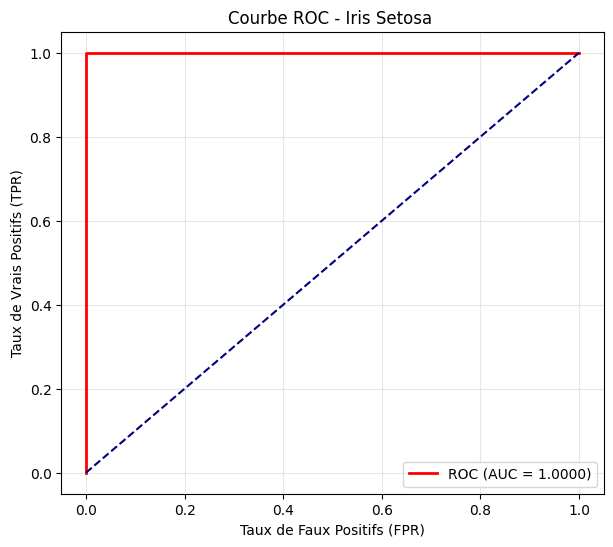

L'aire sous la courbe (AUC) est de : 1.0000


In [33]:

# 1. Calcul des probabilités (Sigmoïde)
# On utilise variables : X_test_l_scaled, theta_log et bias_log
z_test = np.dot(X_test_l_scaled, theta_log) + bias_log
probabilities = 1 / (1 + np.exp(-z_test))

# 2. Paramétrage des seuils
seuils = np.linspace(1, 0, 100)
tpr_liste = []
fpr_liste = []

# 3. Calcul manuel des points TPR et FPR
for s in seuils:
    # On compare les probabilités au seuil s
    preds_s = (probabilities >= s).astype(int)
    
    # On compare aux vrais labels y_test_l
    tp = np.sum((preds_s == 1) & (y_test_l == 1))
    fp = np.sum((preds_s == 1) & (y_test_l == 0))
    tn = np.sum((preds_s == 0) & (y_test_l == 0))
    fn = np.sum((preds_s == 0) & (y_test_l == 1))
    
    tpr = tp / (tp + fn) if (tp + fn) > 0 else 0
    fpr = fp / (fp + tn) if (fp + tn) > 0 else 0
    
    tpr_liste.append(tpr)
    fpr_liste.append(fpr)

# 4. Calcul de l'AUC et Tracé
auc_val = np.trapz(tpr_liste, fpr_liste)

plt.figure(figsize=(7, 6))
plt.plot(fpr_liste, tpr_liste, color='red', lw=2, label=f'ROC (AUC = {auc_val:.4f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('Taux de Faux Positifs (FPR)')
plt.ylabel('Taux de Vrais Positifs (TPR)')
plt.title('Courbe ROC - Iris Setosa ')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

print(f"L'aire sous la courbe (AUC) est de : {auc_val:.4f}")

2.3 Matrice de Confusion

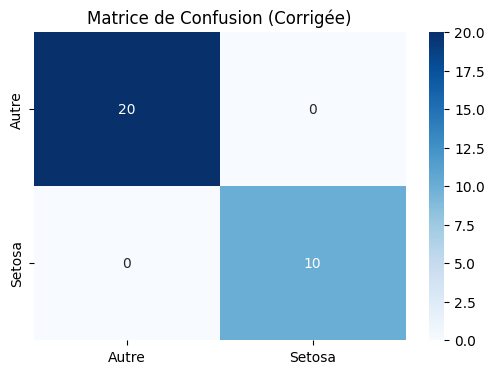

Total des échantillons testés : 30
Vrais Positifs (Setosa bien trouvés) : 10


In [ ]:
# 1. On s'assure que tout est au format entier (0 ou 1) et "plat" (1D)
y_true = np.array(y_test_l).flatten().astype(int)
y_pred = np.array(predictions_finales).flatten().astype(int)

# 2. calcul manuel
tp = np.sum((y_pred == 1) & (y_true == 1))
tn = np.sum((y_pred == 0) & (y_true == 0))
fp = np.sum((y_pred == 1) & (y_true == 0))
fn = np.sum((y_pred == 0) & (y_true == 1))

# 3. construction de la matrice
cm_scratch = np.array([[tn, fp], 
                       [fn, tp]])

# 4. Affichage
plt.figure(figsize=(6, 4))
sns.heatmap(cm_scratch, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Autre', 'Setosa'], 
            yticklabels=['Autre', 'Setosa'])
plt.title('Matrice de Confusion (Corrigée)')
plt.show()

print(f"Total des échantillons testés : {len(y_true)}")
print(f"Vrais Positifs (Setosa bien trouvés) : {tp}")

### Conclusion
Les deux modèles ont été entraînés avec succès. La Régression Linéaire montre que **le tabagisme** est le facteur clé du coût, tandis que la Régression Logistique sépare parfaitement les fleurs Iris avec une **AUC** de 1.0.